In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import string
import nltk
from nltk.corpus import stopwords
from TurkishStemmer import TurkishStemmer

In [17]:
train = pd.read_csv('train.csv')
train.head()

,text,label,dataset
0,ürünü hepsiburadadan alalı 3 hafta oldu. orjin...,Positive,urun_yorumlari
1,"ürünlerden çok memnunum, kesinlikle herkese ta...",Positive,urun_yorumlari
2,"hızlı kargo, temiz alışveriş.teşekkür ederim.",Positive,urun_yorumlari
3,Çünkü aranan tapınak bu bölgededir .,Notr,wiki
4,bu telefonu başlıca alma nedenlerim ise elimde...,Positive,urun_yorumlari


In [18]:
test = pd.read_csv('test.csv')
test.head()

,text,label,dataset
0,Kral akbaba dikkat çekici renklere sahiptir .,Notr,wiki
1,ısrarla korkutmayı başarıyor. sanki korku çok...,Positive,HUMIR
2,Neşe ve Üzüntü köprünün kırılmaya başlamasıyla...,Notr,wiki
3,i phone 5 ten sonra gene 4'' ekranı tercih ett...,Positive,urun_yorumlari
4,Beşinci sezonda diziye yeni oyuncular katıldı .,Notr,wiki


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440679 entries, 0 to 440678
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     440679 non-null  object
 1   label    440679 non-null  object
 2   dataset  440679 non-null  object
dtypes: object(3)
memory usage: 10.1+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48965 entries, 0 to 48964
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     48965 non-null  object
 1   label    48965 non-null  object
 2   dataset  48965 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [12]:
temp = train.value_counts(['label'], normalize=True, sort=True)
temp

label   
Positive    0.535421
Notr        0.349064
Negative    0.115515
dtype: float64

In [14]:
temp = test.value_counts(['label'], normalize=True, sort=True)
temp

label   
Positive    0.535423
Notr        0.349066
Negative    0.115511
dtype: float64

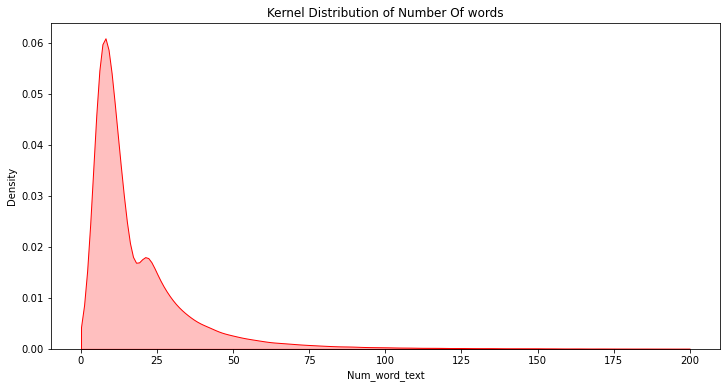

In [25]:
train['Num_word_text'] = train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['Num_word_text'], shade=True, color="r", clip=(0.0, 200)).set_title('Kernel Distribution of Number Of words')

In [29]:
train['dataset'].value_counts()

urun_yorumlari      210693
wiki                153364
HUMIR                58575
tweet-pn              9959
magaza_yorumlari      7627
random                 461
Name: dataset, dtype: int64

In [44]:
train['temp_list'] = train['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,bir,214027
1,ve,180143
2,çok,148174
3,bu,104290
4,ürün,70436
5,için,66079
6,iyi,58413
7,daha,54034
8,ama,52943
9,güzel,52648


In [45]:
train.drop(['temp_list', 'Num_word_text'], axis=1, inplace=True)

,text,label,dataset
0,ürünü hepsiburadadan alalı 3 hafta oldu orjina...,Positive,urun_yorumlari
1,ürünlerden çok memnunum kesinlikle herkese tav...,Positive,urun_yorumlari
2,hızlı kargo temiz alışverişteşekkür ederim,Positive,urun_yorumlari
3,Çünkü aranan tapınak bu bölgededir,Notr,wiki
4,bu telefonu başlıca alma nedenlerim ise elimde...,Positive,urun_yorumlari
...,...,...,...
440674,Ayrıca burç yorumları ve çapraz bulmaca da der...,Notr,wiki
440675,günümüz de ssd olmazsa olmaz bir donanım artık...,Positive,urun_yorumlari
440676,kullandım ve çok memnun kaldım ocak başında da...,Positive,urun_yorumlari
440677,Adını Lenkeran şehrinden almıştır,Notr,wiki


In [4]:
stop_words = stopwords.words("turkish")
stemmer = TurkishStemmer()
def preprocess(text, stem=False):
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [19]:
train['text'] = train['text'].apply(lambda x: preprocess(x, True))
train

,text,label,dataset
0,ürünü hepsiburadadan alalı 3 hafta oldu orjina...,Positive,urun_yorumlari
1,ürünlerden memnunum kesinlikle herkese tavsiye...,Positive,urun_yorumlari
2,hızlı kargo temiz alışverişteşekkür ederim,Positive,urun_yorumlari
3,Çünkü aranan tapınak bölgededir,Notr,wiki
4,telefonu başlıca alma nedenlerim elimdeki sams...,Positive,urun_yorumlari
...,...,...,...
440674,Ayrıca burç yorumları çapraz bulmaca dergide m...,Notr,wiki
440675,günümüz ssd olmazsa olmaz bir donanım artık 25...,Positive,urun_yorumlari
440676,kullandım memnun kaldım ocak başında dakika tu...,Positive,urun_yorumlari
440677,Adını Lenkeran şehrinden almıştır,Notr,wiki


In [20]:
test['text'] = test['text'].apply(lambda x: preprocess(x, True))
test

,text,label,dataset
0,Kral akbaba dikkat çekici renklere sahiptir,Notr,wiki
1,ısrarla korkutmayı başarıyor korku uzun bitmiy...,Positive,HUMIR
2,Neşe Üzüntü köprünün kırılmaya başlamasıyla ge...,Notr,wiki
3,i phone 5 ten sonra gene 4 ekranı tercih ettim...,Positive,urun_yorumlari
4,Beşinci sezonda diziye yeni oyuncular katıldı,Notr,wiki
...,...,...,...
48960,Fransa bayrağı diğer kırmızı zeminden beyaz bi...,Notr,wiki
48961,Yine aynı yıl türkü dalında Murat Çobanoğlu bi...,Notr,wiki
48962,Kurgunu skiyim oç evladı,Negative,tweet-pn
48963,Şarkı sonrasında Damian Marley tarafından sesl...,Notr,wiki


In [56]:
train['temp_list'] = train['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,bir,218473
1,ürün,112804
2,film,83142
3,iyi,65393
4,güzel,56142
5,al,47605
6,tavsi,45821
7,eder,43490
8,olarak,39954
9,var,38416


In [21]:
test.to_csv('stemmed_test.csv')
train.to_csv('stemmed_train.csv')